In [1]:
from packages.script import *

In [2]:
# tworzenie obiektów dla danych predykcji
victims = Victims()
general_info = GeneralInfo()
probability = Probability()
thesis = Thesis()

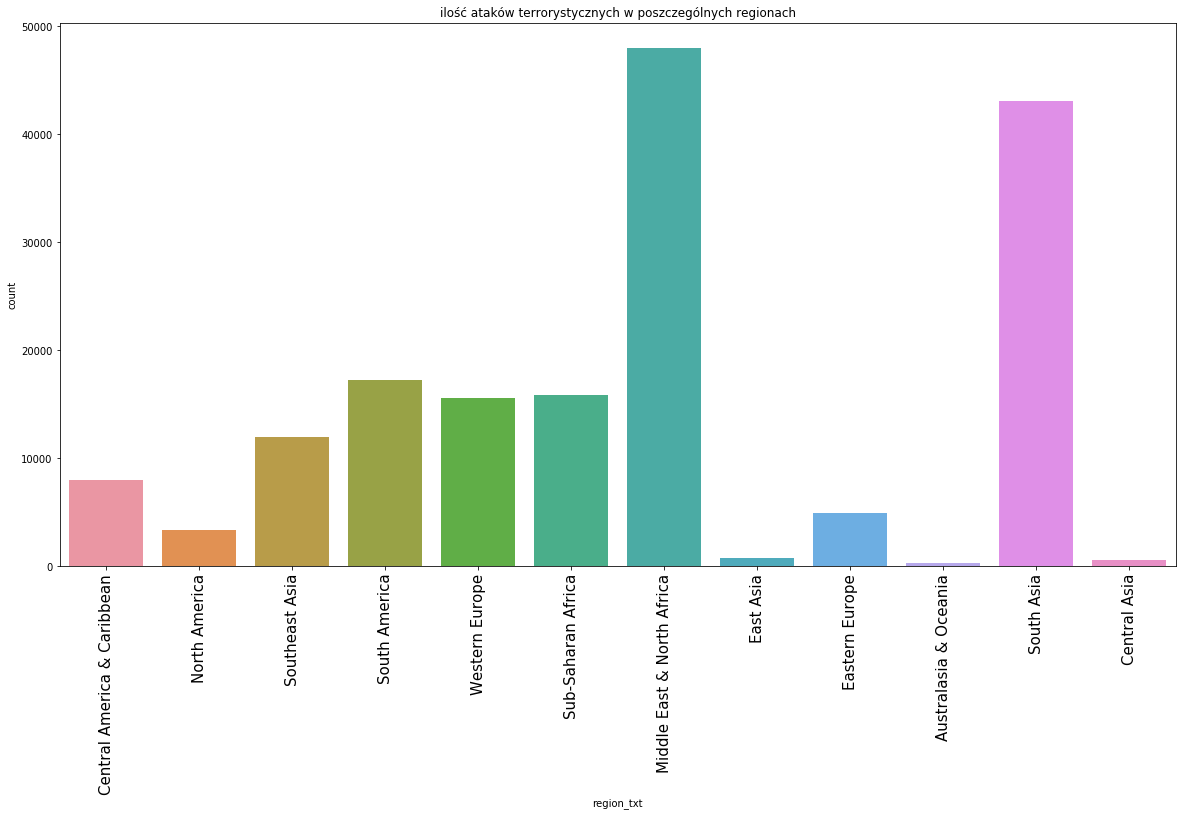

In [3]:
# Ogólny wykres zabójstw 
general_info.region_plots()

In [4]:
# general_info.box_plots()

In [5]:
dataset_probabilities = probability.dataset()
filtred_probabilities, col_name, col_val = probability.filtr(dataset_probabilities)
goal_probabilities = probability.goal(filtred_probabilities)
whole_probabilities = probability.whole(dataset_probabilities)
possibilities = probability.possibility(goal_probabilities, whole_probabilities)
prob_count = possibilities['nkill']
print(f"Prawdopodobieństwo ataku typu: {col_val[1]} w regionie: {col_val[0]} wynosi: {prob_count}")

Prawdopodobieństwo ataku typu: Firearms w regionie: South America wynosi: 0.03664813306418293


In [6]:
dataset_thesis = thesis.dataset()
filtred_thesis_x, filtred_thesis_y, col_name, col_val = thesis.filtr(dataset_probabilities)
question_thesis = thesis.question(filtred_thesis_x, filtred_thesis_y)

AttributeError: Can only use .str accessor with string values!